# hackathon project

## load data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Zenuu19/hackathon/main/transaction_data.csv')
df

,TransactionID,MerchantID,Amount,CustomerID,TransactionAmount,AnomalyScore
0,1,2701,55.530334,1952,79.413607,0.686699
1,2,2070,12.881180,1027,12.053087,0.081749
2,3,2238,50.176322,1955,33.310357,0.023857
3,4,2879,41.634001,1796,46.121117,0.876994
4,5,2966,78.122853,1946,54.051618,0.034059
...,...,...,...,...,...,...
995,996,2150,19.876750,1411,89.457059,0.266778
996,997,2888,96.299792,1566,47.958030,0.512483
997,998,2037,75.164459,1654,64.210046,0.367740
998,999,2629,93.633040,1928,64.684167,0.960364


# data preparation

## data separation as x and y

In [ ]:
y = df['AnomalyScore']
y

0      0.686699
1      0.081749
2      0.023857
3      0.876994
4      0.034059
         ...   
995    0.266778
996    0.512483
997    0.367740
998    0.960364
999    0.311224
Name: AnomalyScore, Length: 1000, dtype: float64

In [ ]:
X = df.drop('AnomalyScore', axis =  1)
X

,TransactionID,MerchantID,Amount,CustomerID,TransactionAmount
0,1,2701,55.530334,1952,79.413607
1,2,2070,12.881180,1027,12.053087
2,3,2238,50.176322,1955,33.310357
3,4,2879,41.634001,1796,46.121117
4,5,2966,78.122853,1946,54.051618
...,...,...,...,...,...
995,996,2150,19.876750,1411,89.457059
996,997,2888,96.299792,1566,47.958030
997,998,2037,75.164459,1654,64.210046
998,999,2629,93.633040,1928,64.684167


## data splitting

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,TransactionID,MerchantID,Amount,CustomerID,TransactionAmount
675,676,2501,26.700168,1322,86.203180
358,359,2859,47.126409,1572,46.655094
159,160,2783,99.243294,1271,20.433903
533,534,2489,49.109929,1477,21.968377
678,679,2540,11.082270,1733,19.615288
...,...,...,...,...,...
855,856,2811,77.929913,1551,41.566733
871,872,2451,21.145855,1920,16.195300
835,836,2869,63.406054,1051,29.359451
792,793,2152,53.967852,1195,28.601558


In [ ]:
X_test

,TransactionID,MerchantID,Amount,CustomerID,TransactionAmount
249,250,2040,60.558081,1244,21.651347
353,354,2208,66.085795,1176,24.820314
537,538,2308,77.116031,1146,28.861853
424,425,2325,52.912489,1708,33.557016
564,565,2212,49.695996,1624,71.229613
...,...,...,...,...,...
684,685,2862,94.337502,1455,19.372089
644,645,2014,67.279859,1287,40.902287
110,111,2570,22.586048,1961,10.625085
28,29,2322,25.334803,1121,73.080408


# model building

## linear regression

### training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### prediction

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([0.50063529, 0.51675614, 0.50046197, 0.50098048, 0.51699204,
       0.51204643, 0.47548241, 0.50697159, 0.50803196, 0.46325453,
       0.44697744, 0.44826364, 0.45412297, 0.44459095, 0.48283485,
       0.53872439, 0.41716226, 0.51797495, 0.46748453, 0.55357205,
       0.50649416, 0.49310331, 0.5068385 , 0.51884479, 0.45238127,
       0.51959397, 0.52541023, 0.47668189, 0.46930655, 0.47083504,
       0.47671504, 0.47425144, 0.51369749, 0.41075199, 0.44961892,
       0.43041813, 0.53774478, 0.54406765, 0.52933885, 0.50124765,
       0.48610924, 0.44466351, 0.53492697, 0.45217898, 0.50851716,
       0.50088359, 0.5379281 , 0.49339021, 0.51456149, 0.54805225,
       0.52220823, 0.48064849, 0.50803838, 0.44341548, 0.49424769,
       0.48181046, 0.49272953, 0.47306951, 0.52340468, 0.46016268,
       0.48995351, 0.44823819, 0.48665545, 0.51163375, 0.44134843,
       0.53636521, 0.48036233, 0.54385112, 0.47611302, 0.46231448,
       0.53076579, 0.47040963, 0.49120668, 0.44262952, 0.50649

In [ ]:
y_lr_test_pred

array([0.44113387, 0.46334357, 0.48376371, 0.47308049, 0.46478857,
       0.42130168, 0.522583  , 0.48754091, 0.53218755, 0.50913369,
       0.48615374, 0.55102188, 0.46525322, 0.52841192, 0.54186784,
       0.52507632, 0.48839705, 0.52387335, 0.46231794, 0.45665758,
       0.50221484, 0.42132956, 0.53781974, 0.45061236, 0.427536  ,
       0.48627407, 0.48931508, 0.44548433, 0.46507955, 0.49980598,
       0.49750188, 0.50610555, 0.43310438, 0.44245915, 0.47482054,
       0.50553805, 0.5397886 , 0.45728347, 0.52011803, 0.47856885,
       0.48554092, 0.43875991, 0.45193641, 0.53200447, 0.501888  ,
       0.46338075, 0.4954624 , 0.48024631, 0.53393521, 0.47467352,
       0.50685476, 0.51304586, 0.4726396 , 0.51242861, 0.45417404,
       0.43770555, 0.48789151, 0.48117686, 0.53991485, 0.50152209,
       0.42448987, 0.51138655, 0.52267705, 0.42822875, 0.48572978,
       0.52627161, 0.4374619 , 0.4620027 , 0.47122796, 0.49856027,
       0.48721185, 0.47869672, 0.52081189, 0.45554556, 0.47248

### evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.08416089898827718
LR R2 (Train):  0.013781725750633966
LR MSE (Test):  0.07317990574409666
LR R2 (Test):  0.002818856715642082


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [ ]:
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.084161,0.013782,0.07318,0.002819


## random forest

### training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### prediction

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [ ]:
y_rf_train_pred

array([0.47977315, 0.53233929, 0.51226943, 0.4895398 , 0.49149774,
       0.50761095, 0.45562356, 0.52802848, 0.48844906, 0.49067793,
       0.48414935, 0.43858089, 0.4603499 , 0.48333404, 0.48876766,
       0.52611541, 0.36128934, 0.49267786, 0.45972846, 0.5361747 ,
       0.49908849, 0.4904575 , 0.48709839, 0.50557911, 0.48042744,
       0.52780579, 0.51085847, 0.46338003, 0.47903374, 0.49648975,
       0.48174199, 0.48547649, 0.52436943, 0.44084804, 0.46656071,
       0.46696029, 0.53544521, 0.53146713, 0.51179856, 0.49878138,
       0.48367548, 0.47745547, 0.52492681, 0.49070344, 0.52190644,
       0.4931562 , 0.5442532 , 0.49515112, 0.49802409, 0.53783568,
       0.48890582, 0.4708224 , 0.49323856, 0.46323387, 0.49774691,
       0.4796275 , 0.48156655, 0.48998668, 0.51646424, 0.45735979,
       0.47298249, 0.46911075, 0.49316332, 0.52446955, 0.45571866,
       0.52597445, 0.48136085, 0.51294464, 0.49004332, 0.41682078,
       0.50838257, 0.45758868, 0.49522886, 0.47535124, 0.48892

In [ ]:
y_rf_test_pred

array([0.46940201, 0.48616501, 0.48800079, 0.49298828, 0.49681759,
       0.44429337, 0.53338371, 0.48580603, 0.51923875, 0.50569498,
       0.48950118, 0.45576114, 0.45618047, 0.52571984, 0.50903053,
       0.52369147, 0.49939474, 0.49731025, 0.49077418, 0.46498572,
       0.48547279, 0.45349078, 0.52990089, 0.44216337, 0.44820394,
       0.49451476, 0.46962619, 0.43116983, 0.48806404, 0.4968413 ,
       0.48567455, 0.54270772, 0.48464791, 0.445472  , 0.48948572,
       0.48730794, 0.51958756, 0.47740678, 0.474348  , 0.47943505,
       0.49954178, 0.45769024, 0.48624871, 0.53581816, 0.49436383,
       0.48748855, 0.49256526, 0.45754783, 0.5091532 , 0.49195056,
       0.52358537, 0.49577658, 0.48922232, 0.50946351, 0.49139288,
       0.41790848, 0.48916796, 0.48195314, 0.52431322, 0.5334837 ,
       0.44605413, 0.50629448, 0.535697  , 0.43772161, 0.49448617,
       0.51369896, 0.44652251, 0.47184614, 0.47292669, 0.49921208,
       0.48231199, 0.48612937, 0.50477987, 0.48988713, 0.49270

### evaluate model performance

In [ ]:


from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  0.08143934548436403
RF R2 (Train):  0.04567356426676483
RF MSE (Test):  0.07310060413705881
RF R2 (Test):  0.0038994548165308673


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [ ]:
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,0.081439,0.045674,0.073101,0.003899


## gradient boosting regression

### training model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, random_state=100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, random_state=100)

### prediction

In [ ]:
y_gbr_train_pred = gbr.predict(X_train)
y_gbr_test_pred = gbr.predict(X_test)

In [ ]:
y_gbr_train_pred

array([0.48910897, 0.54656204, 0.53617438, 0.46886481, 0.44731185,
       0.50486042, 0.47426962, 0.52003964, 0.43871032, 0.50787749,
       0.54647287, 0.4006573 , 0.49720089, 0.54752679, 0.44580493,
       0.67299945, 0.22641981, 0.46518421, 0.4562613 , 0.5780297 ,
       0.48132737, 0.45068306, 0.58719736, 0.4909886 , 0.54235981,
       0.48333306, 0.45522253, 0.40705912, 0.43259382, 0.53055971,
       0.48663021, 0.4344186 , 0.49839307, 0.4369438 , 0.3961884 ,
       0.4575626 , 0.56582007, 0.64848938, 0.62578646, 0.5179243 ,
       0.47860183, 0.47517939, 0.51221596, 0.49820589, 0.53202341,
       0.50609715, 0.59445476, 0.42948307, 0.50998989, 0.5780297 ,
       0.27694564, 0.49411797, 0.49513015, 0.39499345, 0.5188535 ,
       0.46232666, 0.43899735, 0.4782863 , 0.55661102, 0.46484733,
       0.49712688, 0.40228337, 0.52133842, 0.54571662, 0.45701508,
       0.53025352, 0.45637618, 0.53309981, 0.45217169, 0.39213649,
       0.60970459, 0.4562613 , 0.51787567, 0.43789078, 0.35239

In [ ]:
y_gbr_test_pred

array([0.59535953, 0.48611118, 0.48611118, 0.41940839, 0.49487978,
       0.40709703, 0.58521828, 0.48761488, 0.55065903, 0.53365044,
       0.47152572, 0.13343651, 0.4624056 , 0.5320251 , 0.48449698,
       0.51742217, 0.51544639, 0.51370196, 0.52409658, 0.37901725,
       0.49498808, 0.4456754 , 0.54609407, 0.44087965, 0.47450965,
       0.50204816, 0.33312834, 0.35753589, 0.50834582, 0.52513595,
       0.51331824, 0.63486064, 0.49757417, 0.35114244, 0.49757417,
       0.47138424, 0.51713126, 0.43259382, 0.2099106 , 0.55114828,
       0.50553015, 0.42154097, 0.48631968, 0.55664743, 0.48613435,
       0.57259817, 0.48474172, 0.44842586, 0.5439765 , 0.44856063,
       0.56407936, 0.47485169, 0.47622114, 0.52813652, 0.49757417,
       0.50138872, 0.51996897, 0.53024293, 0.55721273, 0.53327856,
       0.44335585, 0.43434426, 0.52815836, 0.46235194, 0.49470938,
       0.52262314, 0.49617976, 0.39103695, 0.48604949, 0.50852053,
       0.44333949, 0.48725469, 0.51994593, 0.49706579, 0.45223

### evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

gbr_train_mse = mean_squared_error(y_train, y_gbr_train_pred)
gbr_train_r2 = r2_score(y_train, y_gbr_train_pred)

gbr_test_mse = mean_squared_error(y_test, y_gbr_test_pred)
gbr_test_r2 = r2_score(y_test, y_gbr_test_pred)

In [ ]:
print('GBR MSE (Train): ', gbr_train_mse)
print('GBR R2 (Train): ', gbr_train_r2)
print('GBR MSE (Test): ', gbr_test_mse)
print('GBR R2 (Test): ', gbr_test_r2)

GBR MSE (Train):  0.06812376569104683
GBR R2 (Train):  0.201708828650338
GBR MSE (Test):  0.07578021235769784
GBR R2 (Test):  -0.03261404929148082


In [ ]:
gbr_results = pd.DataFrame(['Gradient Boosting Regression', gbr_train_mse, gbr_train_r2, gbr_test_mse, gbr_test_r2]).transpose()
gbr_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [ ]:
gbr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Gradient Boosting Regression,0.068124,0.201709,0.07578,-0.032614


# model comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results, gbr_results], axis=0)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.084161,0.013782,0.07318,0.002819
0,Random Forest,0.081439,0.045674,0.073101,0.003899
0,Gradient Boosting Regression,0.068124,0.201709,0.07578,-0.032614


In [ ]:
df_models.reset_index(drop=True)

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.084161,0.013782,0.07318,0.002819
1,Random Forest,0.081439,0.045674,0.073101,0.003899
2,Gradient Boosting Regression,0.068124,0.201709,0.07578,-0.032614


# data visualisation

Text(0.5, 0, 'Experimental AnomalyScore')

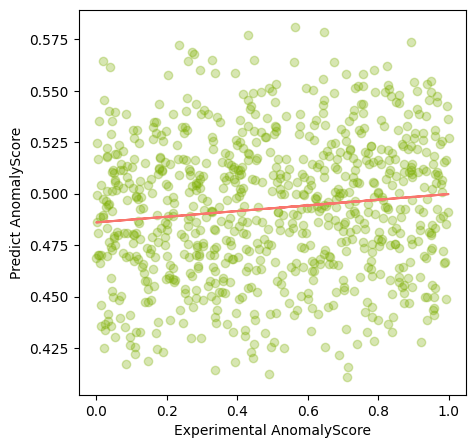

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict AnomalyScore')
plt.xlabel('Experimental AnomalyScore')